In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (accuracy_score,precision_score,recall_score,
confusion_matrix,ConfusionMatrixDisplay,
precision_recall_curve,roc_auc_score,roc_curve)

In [2]:
data = pd.read_csv('Heart_Disease_Prediction.csv')
data.head(1)

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence


In [3]:
df = data.drop('index',axis=1)

In [4]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
X = df.iloc[:,:-1]
y = df['Heart Disease']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75)

In [7]:
labelenc = LabelEncoder()

y_train = labelenc.fit_transform(y_train)
y_test = labelenc.transform(y_test)

In [8]:
svc = SVC(C=2000,kernel='rbf',probability=True)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print(f'Accuracy: {accuracy:.3f}')
print(f'Presion: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(cm)

Accuracy: 0.809
Presion: 0.870
Recall: 0.667
[[35  3]
 [10 20]]


# PR curve and ROC-AUC

In [9]:
# pr curve: 
y_probs = svc.predict_proba(X_test)
y_scores_pos = y_probs[:,1]

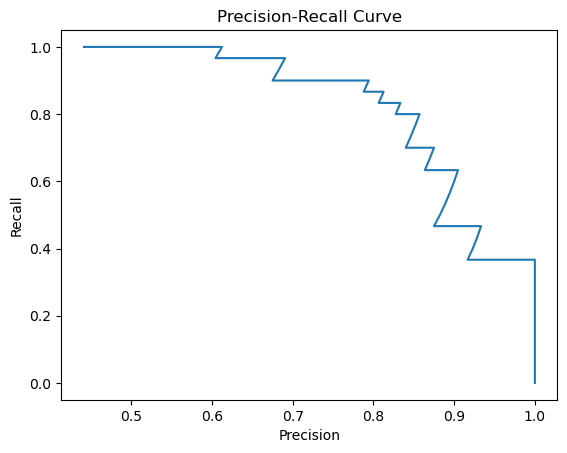

In [10]:
prec,rec,threshold = precision_recall_curve(y_test,y_scores_pos)

plt.figure()

plt.plot(prec,rec)

plt.title('Precision-Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

In [11]:
# ROC-AUC curve, AUC score

In [12]:
auc = roc_auc_score(y_test,y_scores_pos)
print(auc)

0.9175438596491229


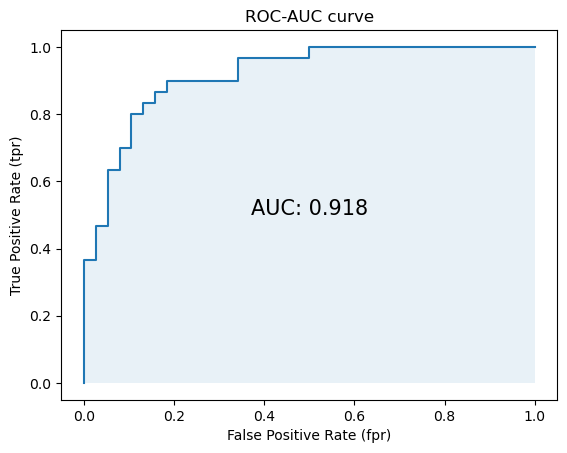

In [13]:
fpr,tpr,threshold = roc_curve(y_test,y_scores_pos)

plt.figure()

plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,alpha=0.1)
plt.annotate(text=f'AUC: {auc:.3f}',xy=(0.5,0.5),fontsize=15,ha='center')

plt.title('ROC-AUC curve')
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.show()

# Training and Comparing with Decision Tree (Not done in class)

In [14]:
DecisionTreeClassifier(max_depth=5)
svc = SVC(C=2000,kernel='rbf',probability=True)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(cm)

Accuracy: 0.794
Precision: 0.788
Recall: 0.788
[[28  7]
 [ 7 26]]
